In [1]:
#python libraries
import os, sys
import numpy as np               # for handling arrays
import h5py as h5                # for reading the COMPAS data
import time                      # for finding computation time
import matplotlib.pyplot as plt  #for plotting

# Import COMPAS specific scripts
# compasRootDir = os.environ['COMPAS_ROOT_DIR']
# sys.path.append(compasRootDir + 'postProcessing/PythonScripts')
from COMPAS.misc.unsupported_utils.compasUtils import printCompasDetails, getEventHistory, getEventStrings

# Choose an output hdf5 file to work with
pathToData = 'COMPAS_Output/COMPAS_Output.h5'

# This is known as an ipython magic command, and allows plots to be produced within the notebook
%matplotlib inline

In [2]:
Data  = h5.File(pathToData)
print(list(Data.keys()))

['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']


In [3]:
SPs = Data['BSE_System_Parameters']
MTs = Data['BSE_RLOF']
CEs = Data['BSE_Common_Envelopes']
SNe = Data['BSE_Supernovae']
DCs = Data['BSE_Double_Compact_Objects']
# Rates = Data['Rates_mu00.025_muz-0.049_alpha-1.778_sigma00.036_sigmaz0.006']
print(SPs.keys())
print(DCs.keys())
# print(Rates.keys())


<KeysViewHDF5 ['CE_Alpha', 'CH_on_MS(1)', 'CH_on_MS(2)', 'Eccentricity@ZAMS', 'Equilibrated_At_Birth', 'Error', 'Evolution_Status', 'LBV_Factor', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS(1)', 'Metallicity@ZAMS(2)', 'Omega@ZAMS(1)', 'Omega@ZAMS(2)', 'Record_Type', 'SEED', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SemiMajorAxis@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Stellar_Type@ZAMS(1)', 'Stellar_Type@ZAMS(2)', 'Unbound', 'WR_Factor']>
<KeysViewHDF5 ['Coalescence_Time', 'Eccentricity@DCO', 'Mass(1)', 'Mass(2)', 'Merges_Hubble_Time', 'Record_Type', 'Recycled_NS(1)', 'Recycled_NS(2)', 'SEED', 'SemiMajorAxis@DCO', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Time']>


[10.83495737 12.81153295 10.06325105 24.71818052 11.32962195  7.18765718
 12.36893579  8.6527162   9.4860786  12.07133372 19.1120531  18.88451964
  9.82880272 14.85872587 14.75860425 14.82073024  7.89984965 14.64008258
 14.7687884  15.86062244 14.67930664 21.4937784  14.48638844 17.12061188
 14.67898725 16.52206175 17.36217823 11.83177907 17.16849023 18.69107476
 11.30992313 13.96402873  8.08542191 14.05910532  9.98531601 15.9758145
 12.55992728 16.35830547  9.7703696   9.90881171 18.49112577 15.31603783
 30.24677311 14.35766395 16.55301869  5.51616257 25.85513605 15.3604237
 12.18785132 10.11804789  7.8919004  41.53422655  9.23438336 15.03084548
 15.97716854 19.25595133 13.73692209 19.95088205  9.59516411  7.56555277
 20.3699804   6.5002136  13.01433017 10.91432542 13.44252818 19.29694265
 10.61184813 11.23680683 25.22730781 12.98289474  8.13761085 14.77126764
 12.0958139   6.78312164 16.80713688 12.28588754  9.39139595 15.67606969
 14.2093683   6.04479322 14.08066074 12.27588715 19.1

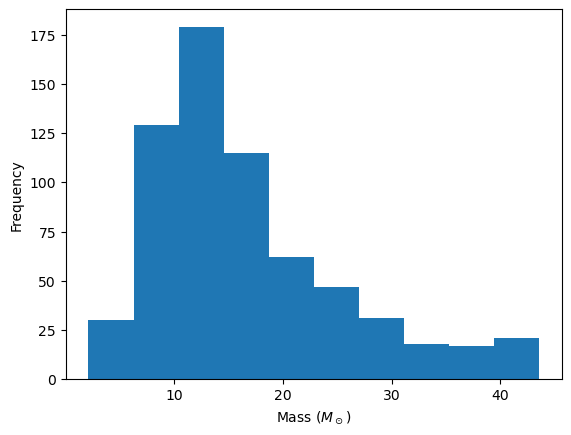

In [4]:
fig, ax = plt.subplots()
m1s = DCs['Mass(1)'][np.where(DCs['Stellar_Type(1)'][:] == 14)]
m2s = DCs['Mass(2)'][np.where(DCs['Stellar_Type(2)'][:] == 14)]
print(m2s)
masses = np.append(m1s, m2s)
ax.hist(masses)
ax.set(xlabel='Mass ($M_\odot$)', ylabel='Frequency')


(array([  2.,   5.,   5.,  31.,  78., 157., 163.,  83.,  74.,  51.]),
 array([0.32848147, 0.4595659 , 0.59065034, 0.72173478, 0.85281921,
        0.98390365, 1.11498808, 1.24607252, 1.37715695, 1.50824139,
        1.63932582]),
 <BarContainer object of 10 artists>)

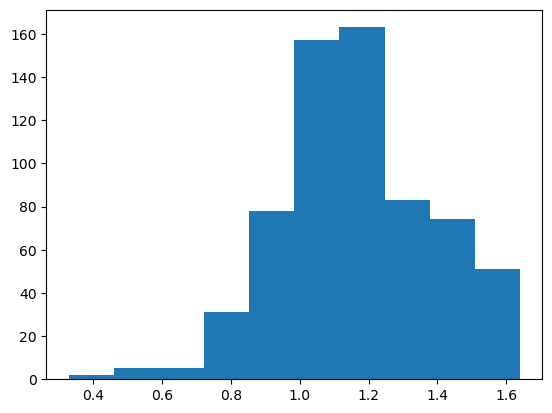

In [7]:
fig, ax = plt.subplots()

ax.hist(np.log10(masses))
ax.set(xlabel='Mass ($M_\odot$)', ylabel='Frequency')

[Text(0.5, 0, 'Mass ($M_\\odot$)'), Text(0, 0.5, 'Density')]

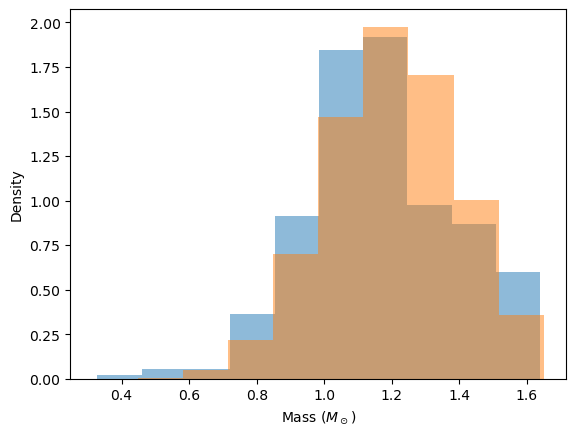

In [38]:
def normal_rand(mean, sd, lower, upper):
    # box-muller transform
    z0 = np.inf
    while not (lower < z0 and z0 < upper):
        r1 = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)

        z0 = np.sqrt(-2 * np.log(r1)) * np.sin(2 * np.pi * r2)
        z0 *= sd
        z0 += mean
    return z0

rvs = [10**normal_rand(1.21, 0.2, 0.3, 1.65) for _ in range(50000)]

fig, ax = plt.subplots()
bins = np.histogram(np.log10(masses))
ax.hist(np.log10(masses), alpha=0.5, density=True)
ax.hist(np.log10(rvs), alpha=0.5, density=True)
ax.set(xlabel='Mass ($M_\odot$)', ylabel='Density')

[Text(0.5, 0, 'Mass ($M_\\odot$)'), Text(0, 0.5, 'Density')]

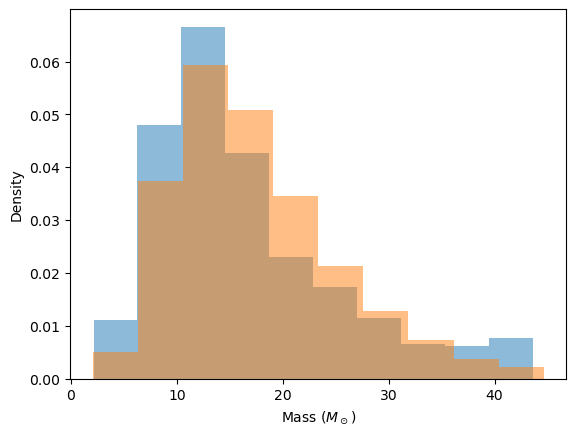

In [39]:
fig, ax = plt.subplots()

ax.hist(masses, density=True, alpha=0.5)
ax.hist(rvs, density=True, alpha=0.5)
ax.set(xlabel='Mass ($M_\odot$)', ylabel='Density')